In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette('Set2')

In [3]:
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('spam.csv',encoding="latin-1")

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1617,ham,Did u download the fring app?,NaN,NaN,NaN
535,ham,"Good afternoon, my love! How goes that day ? I...",NaN,NaN,NaN
4541,spam,FreeMsg Hi baby wow just got a new cam moby. W...,NaN,NaN,NaN
399,ham,Hmmm...k...but i want to change the field quic...,NaN,NaN,NaN
5009,ham,"By the way, 'rencontre' is to meet again. Moun...",NaN,NaN,NaN


In [5]:
#removing unwanted columns and renaming the columns
df = df[["v1","v2"]]
df.rename(columns={"v1":"label","v2":"text"},inplace=True)

In [6]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
df.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
df.duplicated().sum()

403

Remove the duplicated rows

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.label.value_counts()

ham     4516
spam     653
Name: label, dtype: int64

# Visualisations

<AxesSubplot:ylabel='label'>

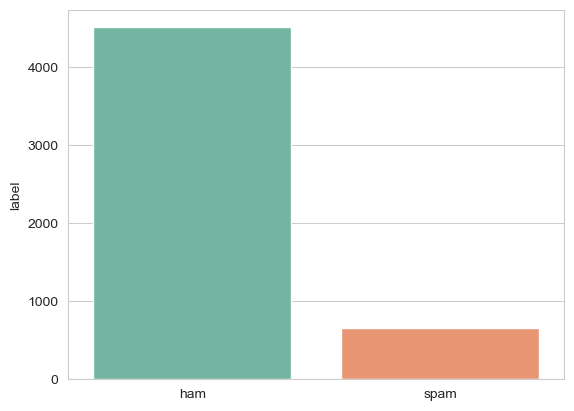

In [13]:
sns.barplot(x=df.label.value_counts().index,y=df.label.value_counts())

Highly imbalanced classes

<AxesSubplot:xlabel='text', ylabel='Count'>

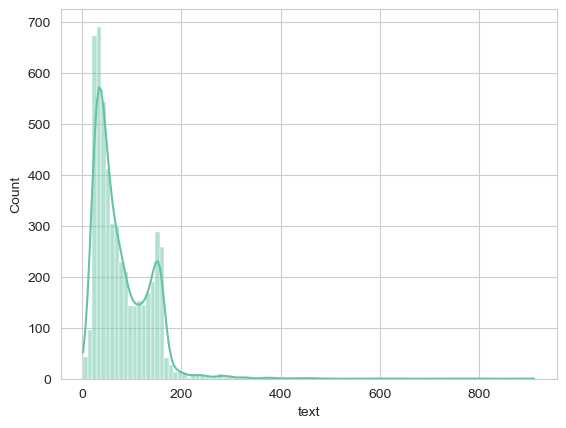

In [14]:
sns.histplot(df["text"].apply(len),bins=100,kde=True)

Most of the length description is in the range of 0 -300

<AxesSubplot:title={'center':'Average Number of Sentences'}, xlabel='type', ylabel='sentences'>

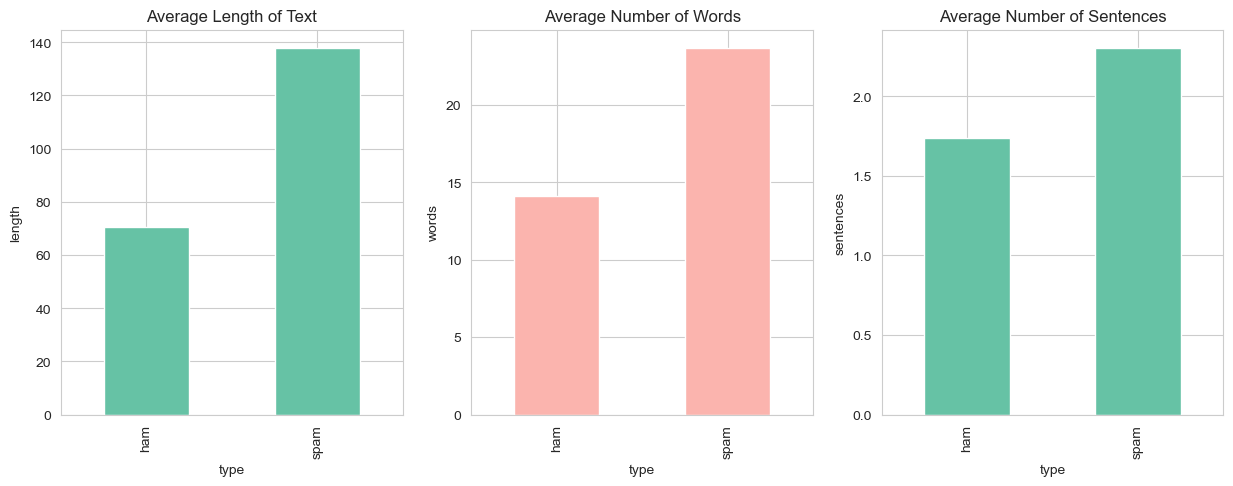

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

df.groupby("label").apply(lambda x: x["text"].apply(len).mean()).plot(
    kind="bar", ax=ax1, title="Average Length of Text",xlabel="type",ylabel="length")

df.groupby("label").apply(lambda x: x["text"].apply(lambda x: len(
    x.split())).mean()).plot(kind="bar", ax=ax2, title="Average Number of Words",xlabel="type",ylabel="words",colormap="Pastel1")

df.groupby("label").apply(lambda x: x["text"].apply(lambda x: len(x.split(
    ". "))).mean()).plot(kind="bar", ax=ax3, title="Average Number of Sentences",xlabel="type",ylabel="sentences")

Clearly spam average length is nearly double of ham
Clearly spam average number of words is nearly double of ham
Clearly spam average sentence count is greater than of ham

In [17]:
pip install wordcloud

     ------------------------------------- 300.6/300.6 kB 76.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


(-0.5, 799.5, 511.5, -0.5)

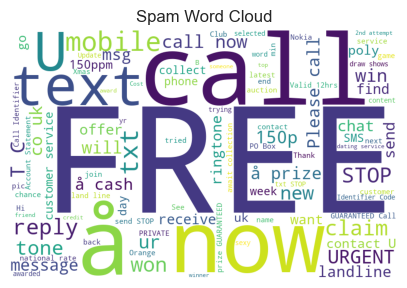

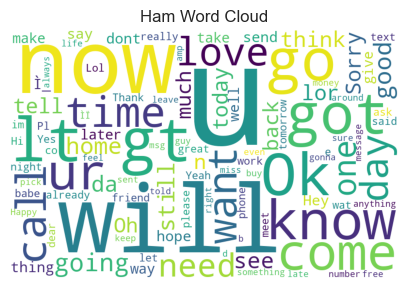

In [18]:
#import wordcloud
from wordcloud import WordCloud

spam_words = ' '.join(list(df[df['label'] == 'spam']['text']))
spam_wc = WordCloud(width = 800,height = 512,max_words=100,background_color="white").generate(spam_words)

plt.figure(figsize = (5, 6))
plt.title('Spam Word Cloud')
plt.imshow(spam_wc)
plt.axis('off')


ham_words = ' '.join(list(df[df['label'] == 'ham']['text']))
ham_wc = WordCloud(width = 800,height = 512,max_words=100,background_color="white").generate(ham_words)

plt.figure(figsize = (5, 6))
plt.title('Ham Word Cloud')
plt.imshow(ham_wc)
plt.axis('off')


# Preprocessing

In [19]:
df["text"].sample(5)

1154    Did u find a sitter for kaitlyn? I was sick an...
1743                     I love to wine and dine my lady!
175     Let me know when you've got the money so carlo...
3648    Hmm ill have to think about it... ok you're fo...
4044                        If You mean the website. Yes.
Name: text, dtype: object

In [23]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [24]:
import re
import string
from nltk.corpus import stopwords
import nltk
stopwd = stopwords.words('english')
def clean_text(text):

    text= text.lower() # Lowercasing the text
    text = re.sub('-',' ',text.lower())   # Replacing `x-x` as `x x`
    text = re.sub(r'http\S+', '', text) # Removing Links
    text = re.sub(f'[{string.punctuation}]', '', text) # Remove punctuations
    text = re.sub(r'\s+', ' ', text) # Removing unnecessary spaces
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text) # Removing single characters
    
    words = nltk.tokenize.word_tokenize(text,language="english", preserve_line=True)
    text = " ".join([i for i in words if i not in stopwd and len(i)>2]) # Removing the stop words

    return text.strip()

In [25]:
df["clean_text"] = df["text"].apply(clean_text)

In [26]:
df.head()

,label,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis great world...
1,ham,Ok lar... Joking wif u oni...,lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win cup final tkts 21st m...
3,ham,U dun say so early hor... U c already then say...,dun say early hor already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though


# Splitting the Data

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df["clean_text"], df["label"], test_size=0.2, random_state=42)

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4135,), (1034,), (4135,), (1034,))

In [29]:
X_train.head()

2228                                     exact intentions
5529                                                  one
2149                              waaaat lololo next time
5058    free video camera phones half price line renta...
5051    tick tick tick could die loneliness know pouts...
Name: clean_text, dtype: object

# Vectorising

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
vectorizer = CountVectorizer(stop_words='english',lowercase=True)
# vectorizer = TfidfVectorizer(stop_words='english',max_features=10000,ngram_range=(1,3),lowercase=True)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

Used Tfidf but countvectorizer is giving more accuracy

In [31]:
X_train_vectorized.shape, X_test_vectorized.shape

((4135, 7759), (1034, 7759))

In [32]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

<AxesSubplot:xlabel='0'>

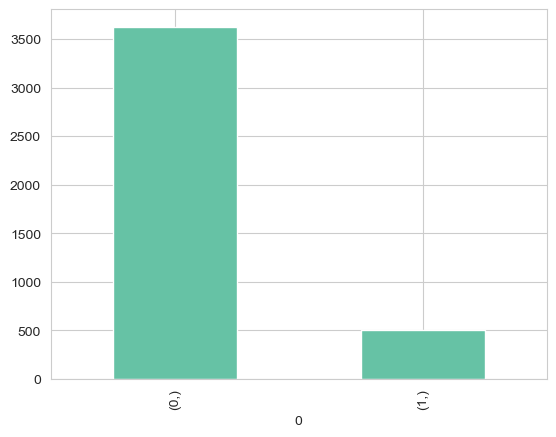

In [33]:
pd.DataFrame(y_train).value_counts().plot(kind="bar")

Balancing both the classes using RandomOverSample

In [38]:
pip install imbalanced-learn

  Using cached imbalanced_learn-0.12.0-py3-none-any.whl (257 kB)
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [39]:
from imblearn.over_sampling import RandomOverSampler

sampler = RandomOverSampler(random_state=42)
# We will pass to it the output of Vectorizer from train data
x_train_resampled, y_train_resampled = sampler.fit_resample(
    X_train_vectorized, y_train)

<AxesSubplot:xlabel='0'>

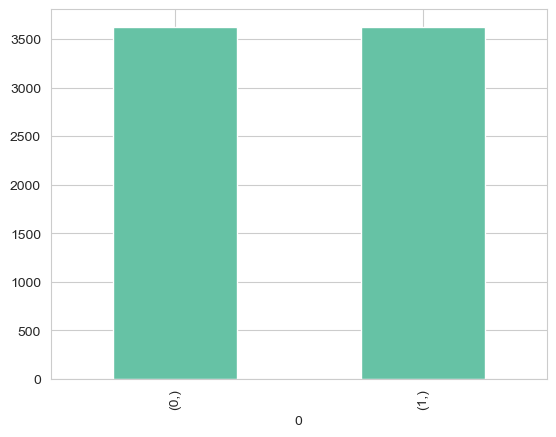

In [40]:
pd.DataFrame(y_train_resampled).value_counts().plot(kind="bar")

In [41]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score

# Modelling

In [42]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000,solver="sag",tol=0.001,max_iter=500,random_state=15)
lr.fit(x_train_resampled,y_train_resampled)

LogisticRegression(C=1000, max_iter=500, random_state=15, solver='sag',
                   tol=0.001)

In [43]:
print("Train Accuracy: ", lr.score(x_train_resampled, y_train_resampled))
print("Test Accuracy: ", lr.score(X_test_vectorized, y_test))
print("Train Precision: ", precision_score(
    y_train_resampled, lr.predict(x_train_resampled)))
print("Test Precision: ", precision_score(y_test, lr.predict(X_test_vectorized)))

Train Accuracy:  1.0
Test Accuracy:  0.9796905222437138
Train Precision:  1.0
Test Precision:  0.9769230769230769


# Scores

In [44]:
y_pred_train_lr = lr.predict(x_train_resampled)
y_pred_test_lr = lr.predict(X_test_vectorized)

In [45]:
from sklearn.metrics import roc_auc_score,roc_curve

modelsdict = {"LR":lr}

scoresdict = {}

for key,value in modelsdict.items():

    Train_ACC=accuracy_score(y_train_resampled,value.predict(x_train_resampled.toarray()))
    Train_Prec=precision_score(y_train_resampled,value.predict(x_train_resampled.toarray()))
    Test_ACC=accuracy_score(y_test,value.predict(X_test_vectorized.toarray()))
    Test_Prec=precision_score(y_test,value.predict(X_test_vectorized.toarray()))

    scoresdict[key] = [Train_ACC,Train_Prec,Test_ACC,Test_Prec]

scoresdf = pd.DataFrame(scoresdict,index=["Train_ACC","Train_Prec","Test_ACC","Test_Prec"]).T

In [47]:
scoresdf

,Train_ACC,Train_Prec,Test_ACC,Test_Prec
LR,1.0,1.0,0.979691,0.976923


<AxesSubplot:title={'center':'Accuracy and Precision Scores'}, xlabel='Models', ylabel='Accuracy'>

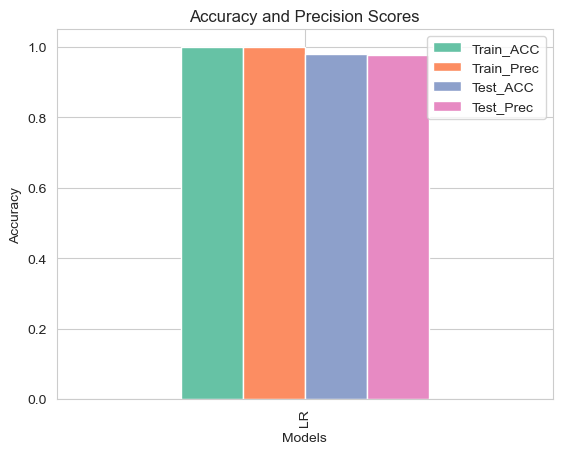

In [48]:
scoresdf.plot(kind="bar",title="Accuracy and Precision Scores",xlabel="Models",ylabel="Accuracy")

ROC curve

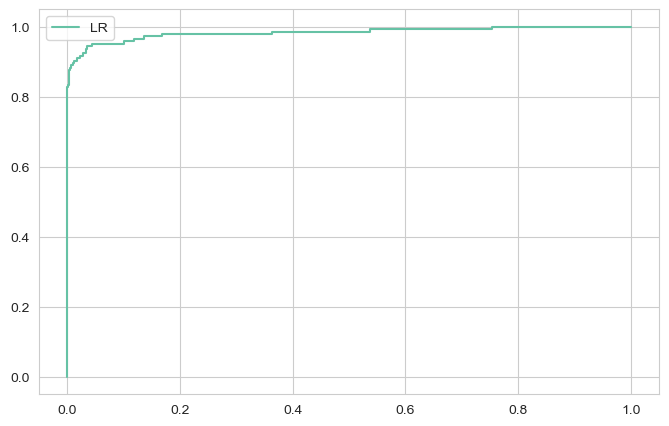

In [49]:
plt.figure(figsize=(8,5))

for key,value in modelsdict.items():
    try:
        fpr,tpr,thresholds = roc_curve(y_test,value.predict_proba(X_test_vectorized.toarray())[:,1])
    except:
        fpr,tpr,thresholds = roc_curve(y_test,value.predict(X_test_vectorized.toarray()))
    plt.plot(fpr,tpr,label=key)
plt.legend()

Text(0.5, 1.0, 'Logistic Regression')

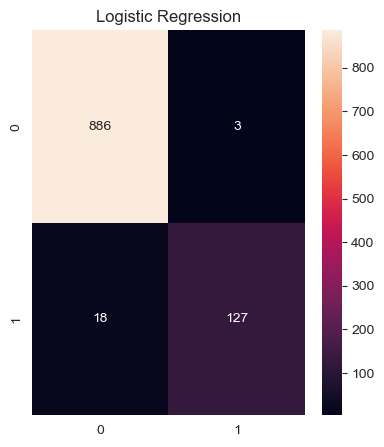

In [51]:
cnf_lr = confusion_matrix(y_test,y_pred_test_lr)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.heatmap(cnf_lr,annot=True,fmt="d")
plt.title("Logistic Regression")

# Test

In [52]:
input1 =''' Hi, I am a student of Charusat University. I am writing this mail to inform you that I have been selected for the internship at Google. I am very excited to work with you.'''
input2 = '''You have won a lottery of 1 million dollars. Please send your bank details to claim the prize.'''
input = clean_text(input1)
# input = clean_text(input2)
print(input)
input = vectorizer.transform([input])
print(le.inverse_transform(lr.predict(input)))

student charusat university writing mail inform selected internship google excited work
['ham']
